In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from os import path
path = '/content/drive/MyDrive/CSV PBO/housing.csv'
df = pd.read_csv(path)

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df_new = df[["longitude","latitude"]]
df_new.describe()

,longitude,latitude
count,20640.000000,20640.000000
mean,-119.569704,35.631861
std,2.003532,2.135952
min,-124.350000,32.540000
25%,-121.800000,33.930000
50%,-118.490000,34.260000
75%,-118.010000,37.710000
max,-114.310000,41.950000


In [406]:
df_new.isnull().sum() #melihat data yang kosong atau tidak

longitude                    0
latitude                     0
Distance from Centroids 0    0
Distance from Centroids 1    0
Distance from Centroids 2    0
Closest_Centroids            0
Color                        0
dtype: int64

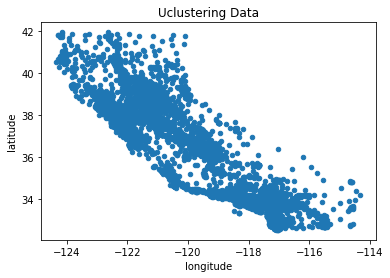

In [407]:
df.plot(kind='scatter', x='longitude', y='latitude')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Uclustering Data')
plt.show()

In [408]:
df = df[["longitude","latitude"]]
df.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [409]:
kmeans = KMeans(n_clusters=3) #proses Kmeans
kmeans.fit(df)

KMeans(n_clusters=3)

In [410]:
labels = kmeans.predict(df) #prediksi
labels 

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [411]:
centroids = kmeans.cluster_centers_ 
centroids

array([[-121.93015196,   38.11351449],
       [-117.88493836,   33.82435098],
       [-119.70940315,   35.9956267 ]])

In [412]:
kmeans.inertia_

18287.012244011297

In [413]:
inertia_list = []
for num_clusters in np.arange(1,21):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

  inertia_list

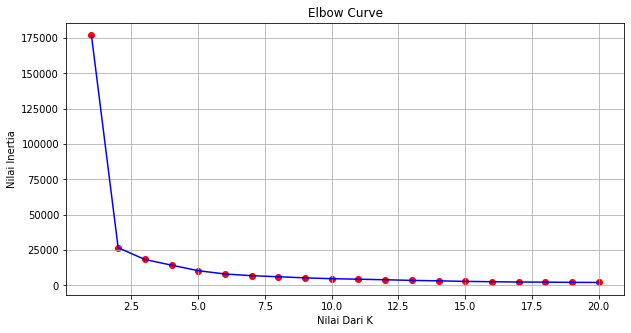

In [414]:
plt.figure(figsize=(10, 5)) #Elbow
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai Dari K')
plt.ylabel('Nilai Inertia')
plt.title('Elbow Curve')
plt.show()

In [415]:
k = 3
np.random.seed(40)

random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(-124,-114), np.random.randint(32,42)])
print('Randomly selected points as random_centroids:', random_centroids)

Randomly selected points as random_centroids: [[-118, 39], [-119, 40], [-116, 34]]


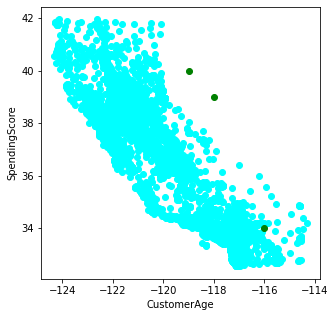

In [416]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
color1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i], color=color1[1])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.show()

In [417]:
def assignment(df_new,random_centroids):
  for i in range(length):
    df_new['Distance from Centroids {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))

  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroids 0'],df_new['Distance from Centroids 1'],df_new['Distance from Centroids 2']):
    d= min(a,b,c)

    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroids'] = list1
  df_new['Color']=list2
  return df_new

In [418]:
df_new = assignment(df_new, random_centroids)
df_new.head()

,longitude,latitude,Distance from Centroids 0,Distance from Centroids 1,Distance from Centroids 2,Closest_Centroids,Color
0,-122.23,37.88,4.375763,3.863586,7.339435,1,g
1,-122.22,37.86,4.371270,3.866264,7.320383,1,g
2,-122.24,37.85,4.393188,3.888457,7.332128,1,g
3,-122.25,37.85,4.402840,3.896794,7.340640,1,g
4,-122.25,37.85,4.402840,3.896794,7.340640,1,g


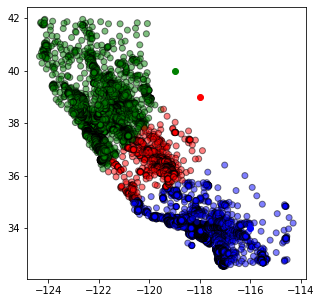

In [419]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color = df_new['Color'],alpha = 0.5,edgecolor= 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=color1[i])

In [420]:
def update(parameter):
  for i in range(length):
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroids'] == i]['longitude'])
    random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroids'] == i]['latitude'])
  return parameter

In [421]:
random_centroids = update(random_centroids)
random_centroids

[[-119.81625488663018, 36.52036747458952],
 [-121.93650828586226, 38.11828068358364],
 [-117.97165248775458, 33.883859242072695]]

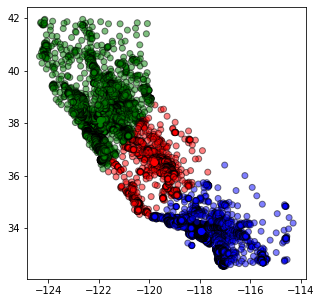

In [422]:
df_new = assignment(df_new,random_centroids)
df_new.head()
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color = df_new['Color'],alpha = 0.5,edgecolor= 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=color1[i])
plt.show()

In [423]:
count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)

  new_random_centroids = np.round(random_centroids)
  print('New Centroid',new_random_centroids)

  df_new = assignment(df_new, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)
  print(result)
  if result == True:
    break

  print(count)

Old Centroid [[-120.   37.]
 [-122.   38.]
 [-118.   34.]]
New Centroid [[-120.   36.]
 [-122.   38.]
 [-118.   34.]]
False
2
Old Centroid [[-120.   36.]
 [-122.   38.]
 [-118.   34.]]
New Centroid [[-120.   36.]
 [-122.   38.]
 [-118.   34.]]
True


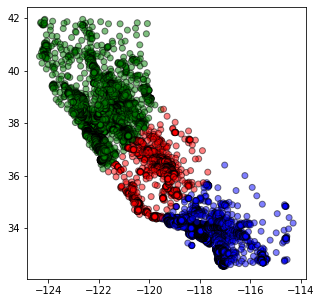

In [424]:
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color = df_new['Color'],alpha = 0.5,edgecolor= 'k')
plt.show()

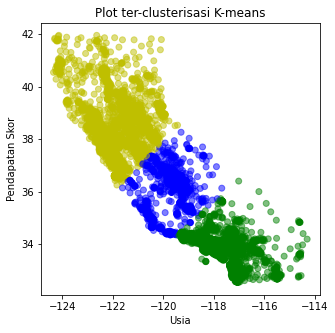

In [425]:
plt.figure(figsize=(5,5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)
plt.scatter(df['longitude'],df['latitude'], color=colors1, alpha=0.5)
for idx, centroids in enumerate(centroids):
  plt.scatter(*centroids, color=colmap[idx+1])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Plot ter-clusterisasi K-means')
plt.show()